In [3]:
from os.path import join
import numpy as np

from scipy.interpolate import interp2d
from pyproj import Proj, transform

from mtpy.modeling.modem import Model, Data
from mtpy.utils import gis_tools

from mtpy.contrib.netcdf import nc

from mtpy.contrib.netcdf.modem_to_netCDF import interpolate, median_spacing

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\gempy2021\lib\_collections_abc.py:720: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  yield from self._mapping
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\gempy2021\lib\site-packages\mtpy\imaging\mtcolors.py:252: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  cmapdict.update(cm.cmap_d)


If you want to write a vtk file for 3d viewing, you need download and install evtk from https://bitbucket.org/pauloh/pyevtk
Note: if you are using Windows you should build evtk first witheither MinGW or cygwin using the command: 
    python setup.py build -compiler=mingw32  or 
    python setup.py build -compiler=cygwin
If you want to write a vtk file for 3d viewing, you need download and install evtk from https://bitbucket.org/pauloh/pyevtk


## Data

The SG file is from http://pid.geoscience.gov.au/dataset/ga/130832

This release includes preliminary AusLAMP models in an under-explored region between Tennant Creek in the Northern Territory and Cloncurry in Queensland. Long period magnetotelluric data from 155 sites were used in this model. Magnetotelluric data acquisition in this region continues. The preliminary model results provide new insights to the lithospheric architecture and mineralisation in the region. There is a connection between conductive anomalies, large-scale lithospheric boundaries and the distribution of mineral deposits.



In [4]:
model = Model()
model.read_gocad_sgrid_file(r'J:\AusLAMP\130832_Model_files\AusLAMP_TISA.sg')

workdir is None
setting filepath to fn path
Calculating center position
FZ:***3 sea_level =  17488.4257813


In [5]:
print(model.res_model.shape)

(100, 100, 19)


### Text Version

In [6]:
savepath = r'J:\AusLAMP'
model.write_xyzres(savefile=savepath + "\\" + 'text.xyzres',location_type='EN',origin=[0,0],model_epsg=None,log_res=False,model_utm_zone=None,clip=[0,0])

### VTK Version

#### Setup
You need to install pyevtk - anaconda works - and it will also give you an error that you need FORTRAN array ordering  
e.g. in a notebook:  
!conda install pyevtk --yes  

In [7]:
#you need to install pyevtk - anaconda works - and it will also give you an error that you need FORTRAN array ordering

model.res_model = np.asfortranarray(model.res_model)
model.write_vtk_file(vtk_save_path=savepath,vtk_fn_basename='TISA_ModEM_model_res')

  model dimensions = (100, 100, 19)
     * north         100
     * east          100
     * depth         19


### Viewing check

Similarly:
!conda install pyvista --yes [this can be a bit trickier, and isn't necessary]  

In [8]:
import pyvista as pv

tisa = pv.read(savepath + "\\" + 'TISA_ModEM_model_res.vtr')

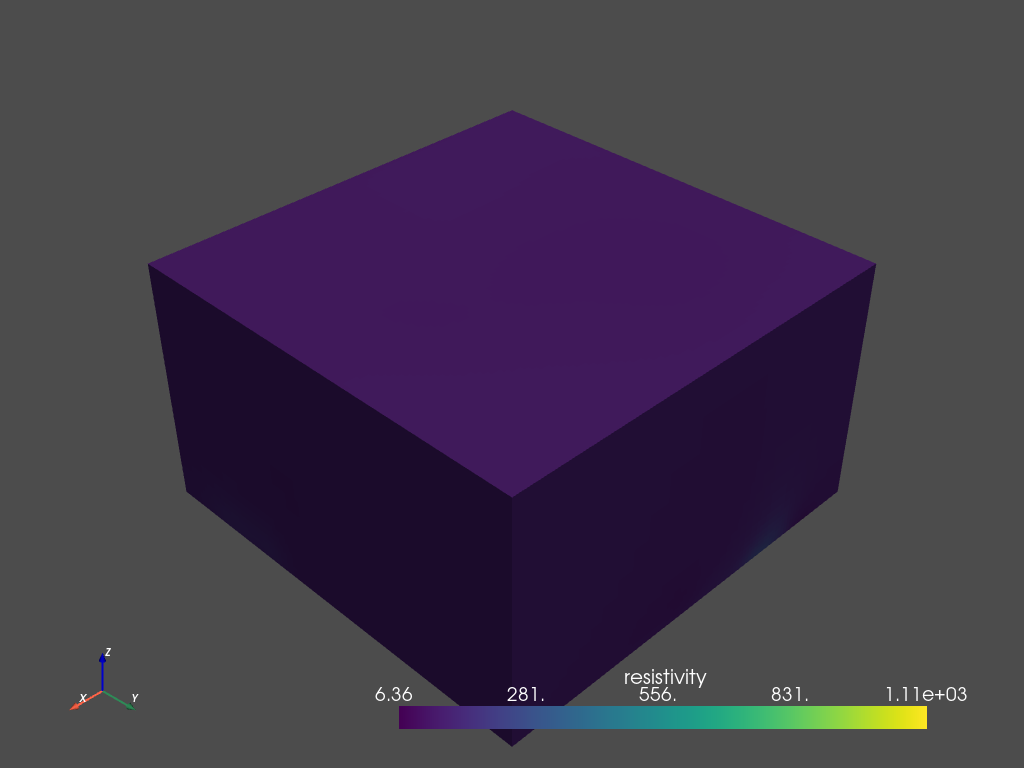

[(1701.5616790284096, 1701.5616790284096, 2005.1399856690346),
 (0.0, 0.0, 303.57830664062504),
 (0.0, 0.0, 1.0)]

In [9]:
tisa.plot()

Now we have a Visual Took Kit version that can be used many places.